In [47]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [49]:
df.shape

(200, 5)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [51]:
# tüm sütunlarda 200 değer olduğu için eksik değer yok gibi

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [52]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [53]:
df.drop('CustomerID',axis=1,inplace=True)

In [54]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [56]:
import seaborn as sns

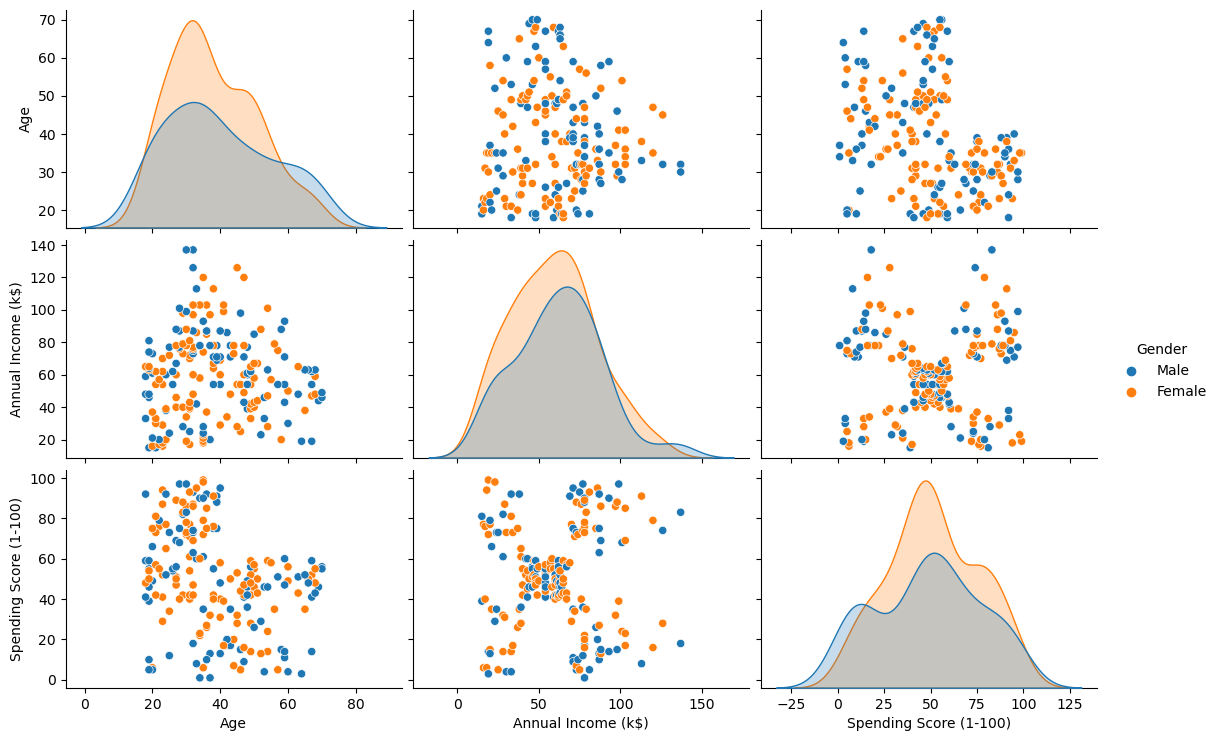

In [57]:
sns.pairplot(df, hue = 'Gender' , aspect = 1.5)

In [58]:
df.columns = [ 'Gender', 'Age', 'Annual Income','Spending Score']
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [59]:
X = df[['Annual Income','Spending Score']]

In [60]:
X

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


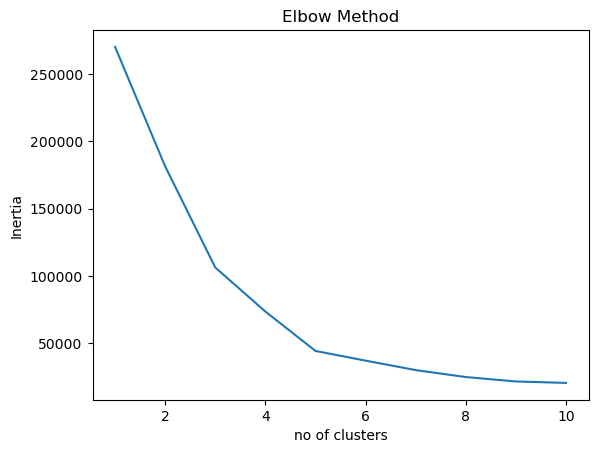

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clusters = []

for i in range(1,11):
    kmeans= KMeans(n_clusters=i , init = 'k-means++',random_state=0)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
    
    
plt.plot(range(1,11),clusters)
plt.title('Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Inertia')
plt.show()

In [63]:
# Optimum küme sayısı olarak yukarıdaki grafik aracılığıyla 5 değerini seçiyoruz.

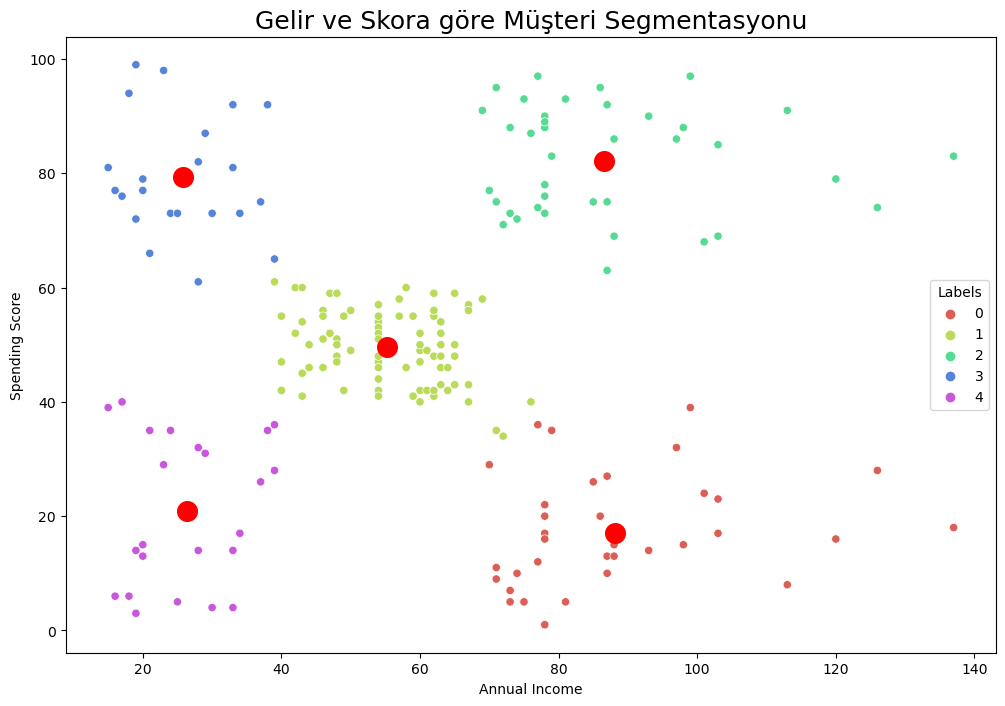

In [69]:
km_5 = KMeans(n_clusters=5 , init ='k-means++',random_state = 0)
km_5.fit(X)
centroids = km_5.cluster_centers_
X['Labels'] = km_5.labels_

plt.figure(figsize=(12,8))

sns.scatterplot(data = X ,x = X['Annual Income'],y = X['Spending Score'], hue = X['Labels'],
                palette = sns.color_palette('hls',5))

plt.scatter(centroids[:,0],centroids[:,1],c='red',s=200)

plt.title('Gelir ve Skora göre Müşteri Segmentasyonu',fontsize=18)
plt.show()